# **1.Import the Python libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import scipy.stats as stats
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model

# **2.Import the Dataset**

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# **3.Exploratory Data Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


***Checking for missing data***

In [6]:
df.isnull().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


# **4.Data Visualization**

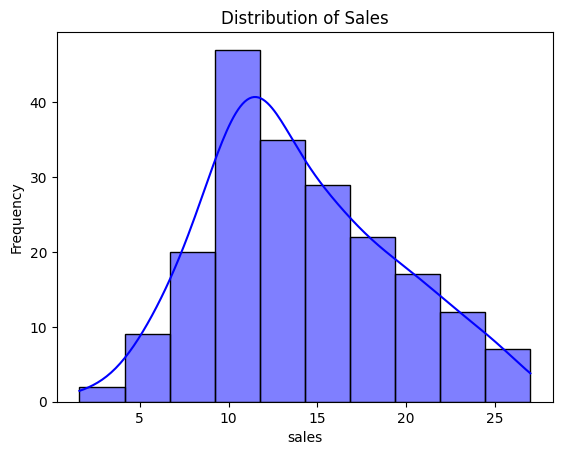

In [7]:
sns.histplot(df['sales'], bins=10 , kde=True , color='blue')
plt.xlabel('sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

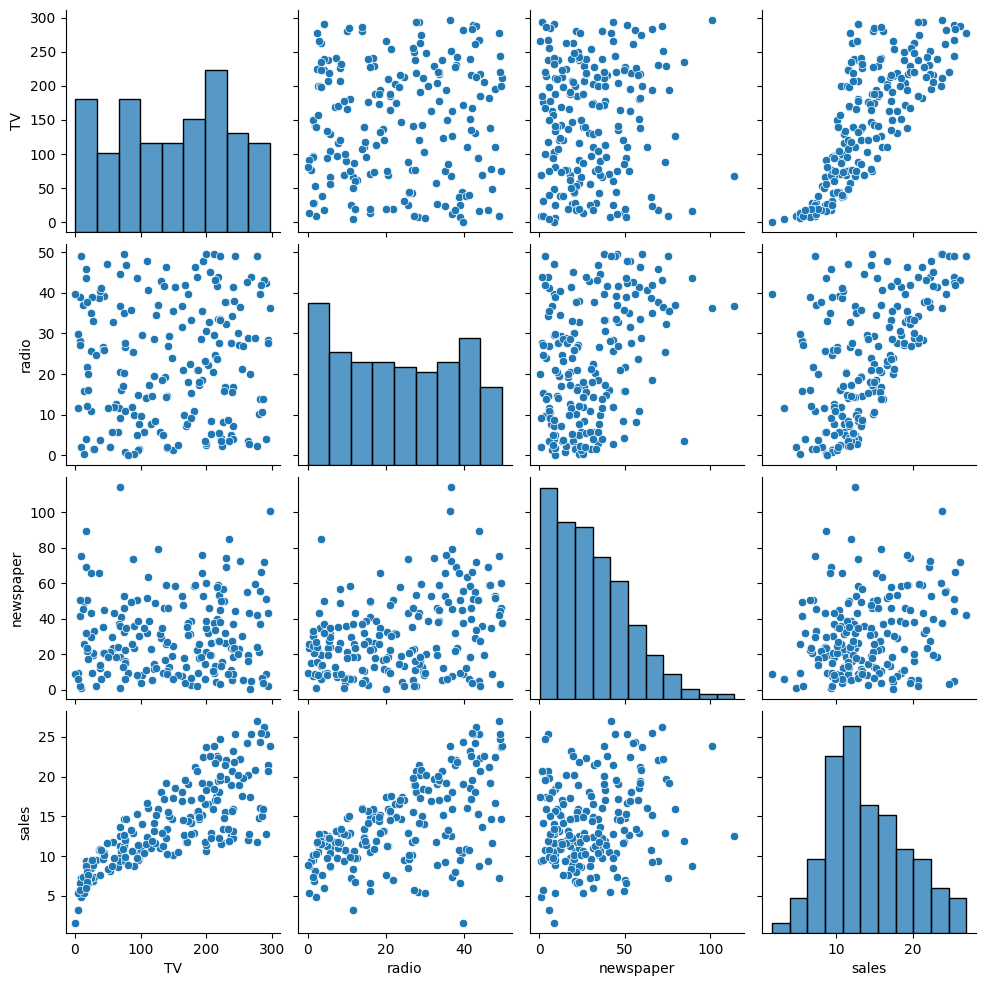

In [8]:
sns.pairplot(df)

<Axes: >

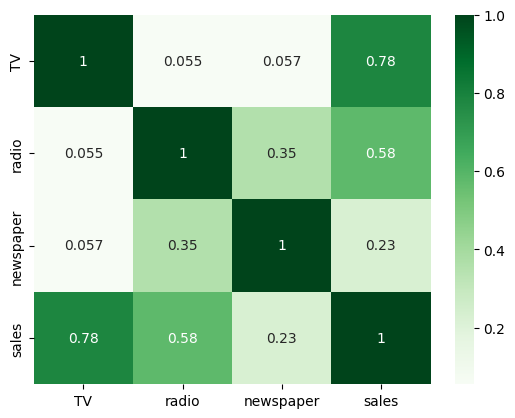

In [9]:
sns.heatmap(df.corr(), annot=True , cmap='Greens')

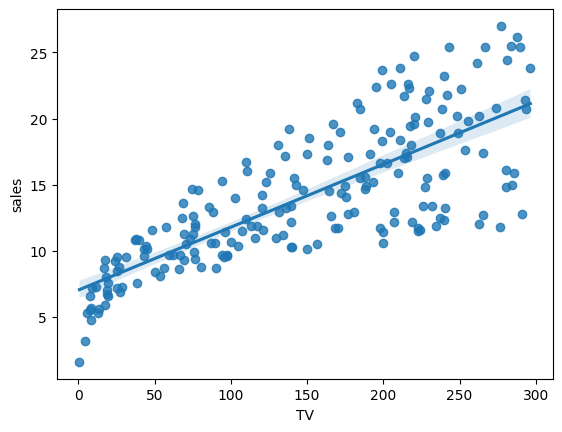

In [16]:
y=df['sales']
X=df.drop(['sales'],axis=1)
sns.regplot(x='TV',y=y,data=df)
plt.show()

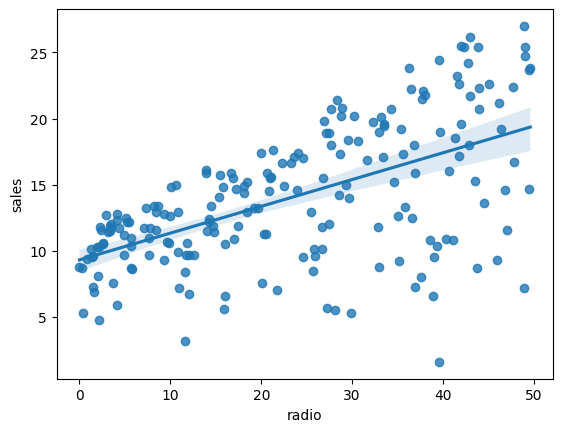

In [18]:
sns.regplot(x='radio',y=y,data=df)
plt.show()

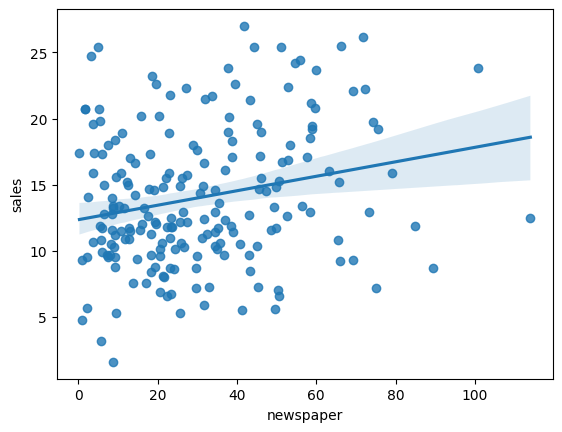

In [21]:
sns.regplot(x='newspaper',y=y,data=df)
plt.show()

# **5.Scaling the features:**

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe()

,TV,radio,newspaper
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.221245e-16,-4.529710e-16,2.220446e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.708823e+00,-1.570868e+00,-1.392646e+00
25%,-8.485295e-01,-8.973206e-01,-8.195504e-01
50%,3.161515e-02,-2.457858e-02,-2.211368e-01
75%,8.381955e-01,8.954299e-01,6.695788e-01
max,1.744029e+00,1.778300e+00,3.841171e+00


# **6.Split the data into training and testing sets**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

# **7.Create and train the regression model**

In [24]:
from sklearn.linear_model import LinearRegression
mymodel=LinearRegression()
mymodel.fit(X_train,y_train)


LinearRegression()

# **8.Make predictions on the test set:**

In [25]:
y_pred=mymodel.predict(X_test)
y_pred

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

# **9.Model slope and intercept terms**

In [26]:
mymodel.intercept_

2.652789668879498

In [27]:
mymodel.coef_

array([0.0454256 , 0.18975773, 0.00460308])

# **10.Evaluate model performance**

# **i. RMSE**

In [28]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 1.36


# **ii. R2 Score**

In [29]:
from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.91


# **iii. Overfitting Vs Underfitting**

In [30]:
# Evaluating training set performance
print("Training set score: {:.2f}".format(mymodel.score(X_train, y_train)))

Training set score: 0.89


In [31]:
# Evaluating test set performance
print("Test set score: {:.2f}".format(mymodel.score(X_test, y_test)))

Test set score: 0.91


# **iv. Cross validation**

In [32]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(mymodel, X, y, cv=5)
print(cv_scores.round(4))

[0.8787 0.9176 0.9293 0.8144 0.8955]


In [33]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(4)))

Average 5-Fold CV Score: 0.8871


A score of 0.8871 (assuming this is accuracy, R-squared, or another metric) is quite high, suggesting that our model is able to predict outcomes correctly in approximately 88.71% of the cases or explains 88.71% of the variance in the dependent variable.

# **v. Residual analysis**

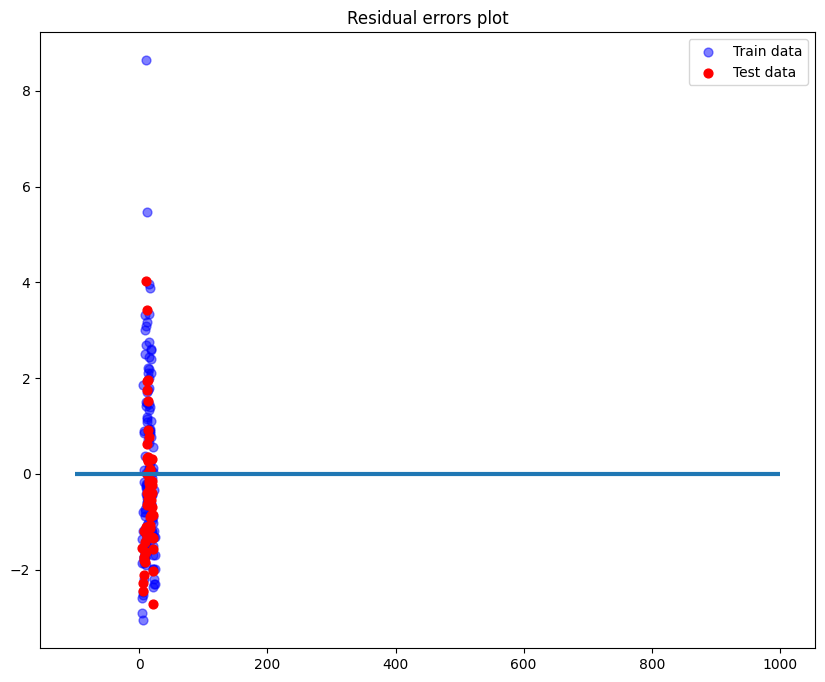

In [34]:
# Plot for residual error
# adjust the figure size
plt.figure(figsize=(10,8))
# plotting residual errors in training data
plt.scatter(mymodel.predict(X_train), mymodel.predict(X_train) - y_train, c = 'b', s = 40, label = 'Train data', alpha = 0.5)

# plotting residual errors in test data
plt.scatter(mymodel.predict(X_test), mymodel.predict(X_test) - y_test, c = 'r', s = 40, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = -100, xmax = 1000, linewidth = 3)

# plotting legend
plt.legend(loc = 'upper right')

# plot title
plt.title("Residual errors plot")

# function to show plot
plt.show()

*Interpretation*:

*   **Random Scatter Around Zero:**


The majority of the residuals (errors) for both the training and test data are clustered around the zero line. This indicates that the model is making predictions that are close to the actual values on average. There doesn't appear to be a systematic pattern, which is a good sign.

*  **No Clear Pattern:**

The points are scattered without forming any discernible pattern, which suggests that the assumption of homoscedasticity (constant variance of residuals) is likely being met. This is essential for validating the goodness of fit in a linear regression model.

* **Outliers:**

There are a few residuals that are significantly higher than others, particularly on the upper side of the plot. These points might represent outliers where the model's predictions were not as accurate. However, these points seem relatively isolated and do not indicate a widespread issue.

*  **Train vs. Test Data:**

Both the training data (blue) and test data (red) appear to have similar distributions of residuals. This is important because it suggests that the model generalizes well to unseen data and is not overfitting to the training data.

# **vi. Normality test (Q-Q Plot)**

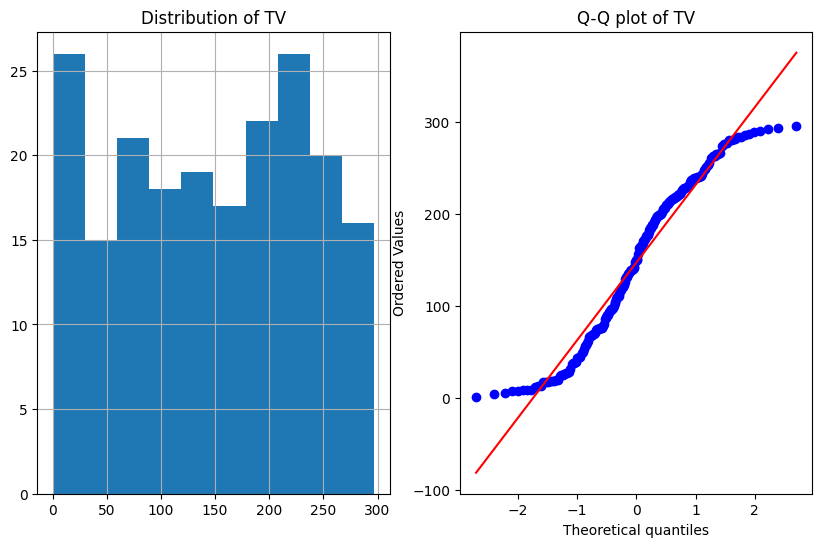

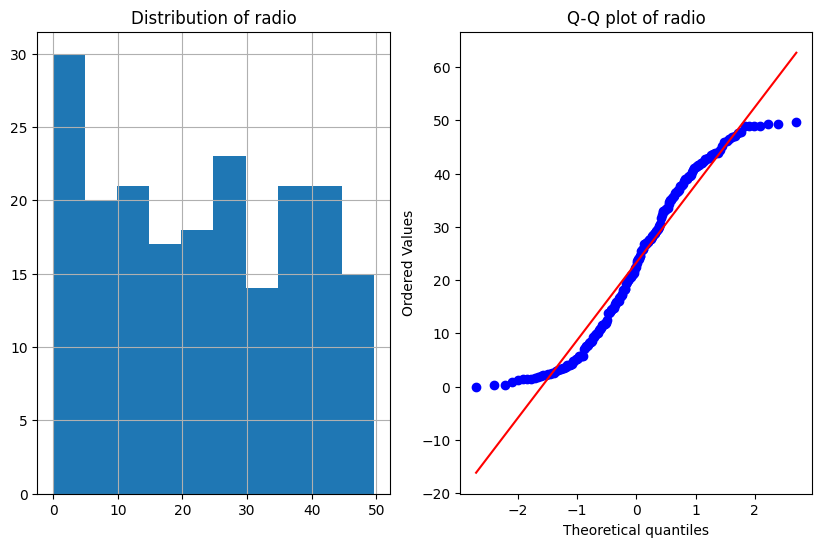

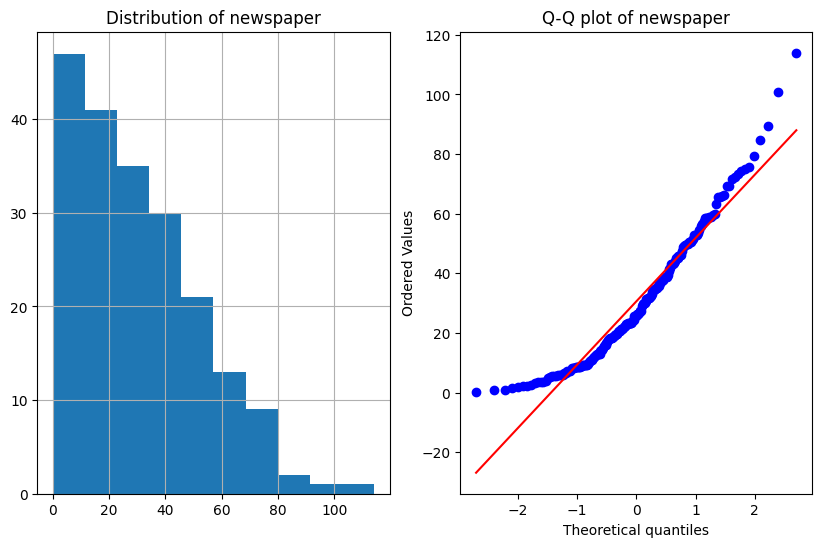

In [35]:
import pylab
import scipy.stats as stats


for var in ['TV', 'radio', 'newspaper']:

    plt.figure(figsize=(10,6))

    plt.subplot(1, 2, 1)
    df[var].hist()
    plt.title('Distribution of '+ var)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of '+ var)

    plt.show()

The Q-Q plot of all the variables confirm that the variables are not normally distributed.

Hence, the variables do not pass the normality test.

In [40]:
import statsmodels.api as sm
X = sm.add_constant(X)
mymodel = sm.OLS(y, X).fit()
print(mymodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           1.58e-96
Time:                        23:52:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

* This indicates that approximately 89.7% of the variance in the dependent variable (sales) can be explained by the independent variables in the model.

* Durbin-Watson: The value of 2.084 suggests no significant autocorrelation in the residuals, which is a positive sign for the model.

* Omnibus and Jarque-Bera (JB) Tests: Both tests indicate that the residuals are not normally distributed (significant p-values).